# Módulo 06 Tarefa 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_b = pd.read_csv("/content/SINASC_RO_2019 V2.csv")
df_b.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
df_b.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [10]:
df = df_b[["IDADEMAE", "PESO", "SEXO"]]
df.head()

,IDADEMAE,PESO,SEXO
0,19,3685,Masculino
1,29,3055,Feminino
2,37,3460,Feminino
3,30,2982,Feminino
4,30,3310,Feminino


In [11]:
# Para verificar se os valores, possivelmente nulos existentes,
# foram excluídos, antes eu analiso a quantidade inicial dos dados
# presentes a partir do "shape".

df.shape

(27028, 3)

In [13]:
# Verificando se há valores nulos:

df.isna().sum()

IDADEMAE    0
PESO        0
SEXO        4
dtype: int64

In [14]:
df = df.dropna()

In [16]:
df.shape

(27024, 3)

In [17]:
# Como a quantidade de dados é muito elevada, e eu não quero demorar para elaborar
# os dados graficamente, irei deles tirar uma amostra, sem que comprometa à análise.
# Para tanto:

# Como o meu professor de estatística da faculdade (ESEG) diz que o nível
# de amostragem mínimo costuma ser, por consenso, maior ou igual a 30%,
# define uma proporção amostral de 30%, em termos decimais de 0.3.

# Proporção amostral
proporcao_amostragem = 0.3

# Realiza amostragem estratificada, armazenando numa nova varíavel.
# Estou agrupando o df a partir da coluna sexo, aplicando uma função
# anônima, lambda, para realizar a estratificação.

df_amostral = df.groupby('SEXO', group_keys=False).apply(lambda x: x.sample(frac=proporcao_amostragem))
df_amostral

,IDADEMAE,PESO,SEXO
4315,34,3305,Feminino
2352,24,3070,Feminino
22582,30,3185,Feminino
13492,22,3525,Feminino
14237,33,2850,Feminino
...,...,...,...
11078,30,3140,Masculino
4734,19,4200,Masculino
1388,28,3470,Masculino
19132,27,3200,Masculino


####  1) Na base do SINASC do DataSUS, faça um boxplot da idade da mãe.

<Axes: >

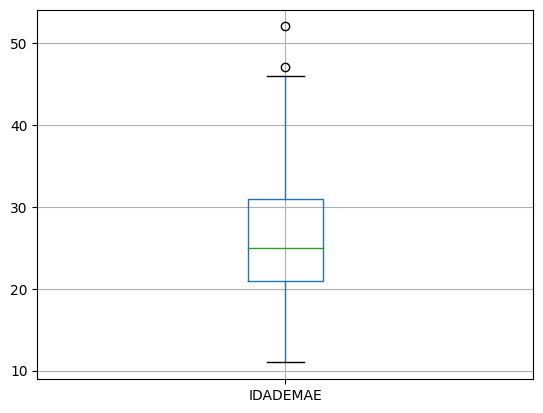

In [18]:
# Criando um boxplot com a idade da mãe:

df_amostral[["IDADEMAE"]].boxplot()

####  2) Faça um boxplot do peso do bebê

<Axes: >

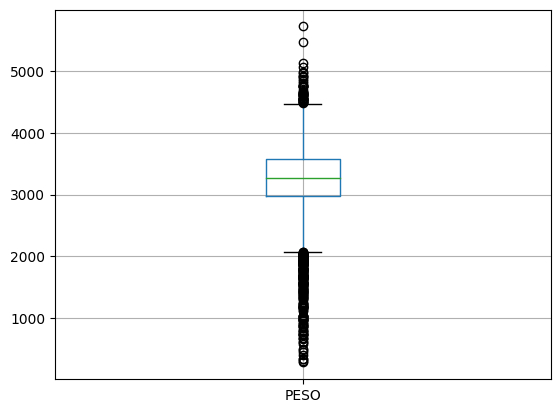

In [19]:
# Criando um boxplot com os pesos dos bebês.
# Notei algo, há muito outiliers, tanto "máximos"
# quanto "mínimos".

df_amostral[["PESO"]].boxplot()

<Axes: ylabel='Frequency'>

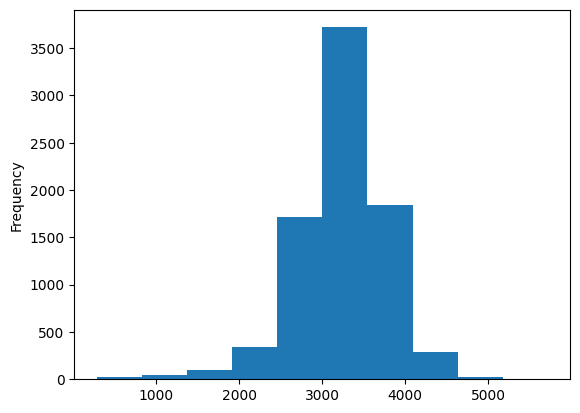

In [20]:
# Olhando de uma outra forma, por meio do histograma, consigo identificar
# melhor os outilers presentes no gráfico de boxplot. De fato, como mostrado
# eles apresentam um maior contingente em valores que fogem à média de modo
# negativo, isto é, sendo valores inferiores a ela, do que o oposto.
# A densidade dos gráficos é maior entre os valores entre aproximadamente
# 4500 e 2000.

df_amostral["PESO"].plot.hist()

In [24]:
# Caso eu queira "enxurgar" a quantidade de outliers, eu posso fazer isso:

df_amostral_2 = df_amostral.loc[(df_amostral['PESO'] >=2000) & (df_amostral['PESO'] < 4500)]
df_amostral_2

,IDADEMAE,PESO,SEXO
4315,34,3305,Feminino
2352,24,3070,Feminino
22582,30,3185,Feminino
13492,22,3525,Feminino
14237,33,2850,Feminino
...,...,...,...
11078,30,3140,Masculino
4734,19,4200,Masculino
1388,28,3470,Masculino
19132,27,3200,Masculino


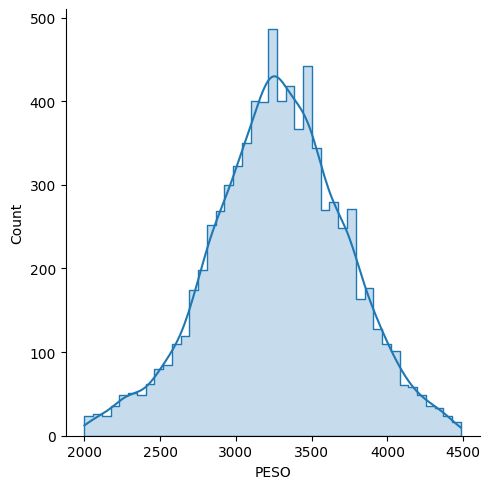

In [27]:
# Visualizando o novo gráfico formado. Verifca-se que
# ele se assemelha a uma função normal.

sns.displot(data = df_amostral_2,
            alpha = 0.25,
            x = "PESO",
            element = "step", # Remove as linhas que delimitam as barras.
            kde = True)

<Axes: >

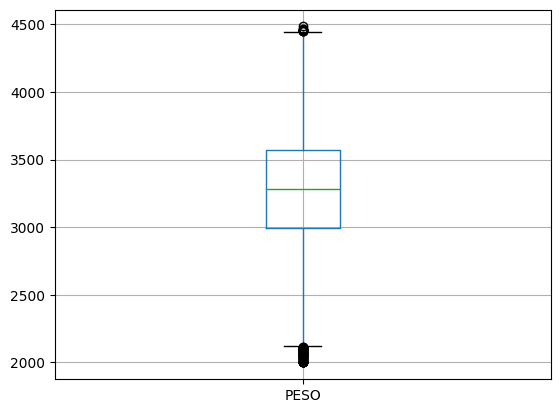

In [30]:
df_amostral_2[["PESO"]].boxplot()

# Boxplot encontrado depois de ter "enxugado" os outliers comentados.

####  3) Faça um histograma da idade da mãe

<Axes: ylabel='Frequency'>

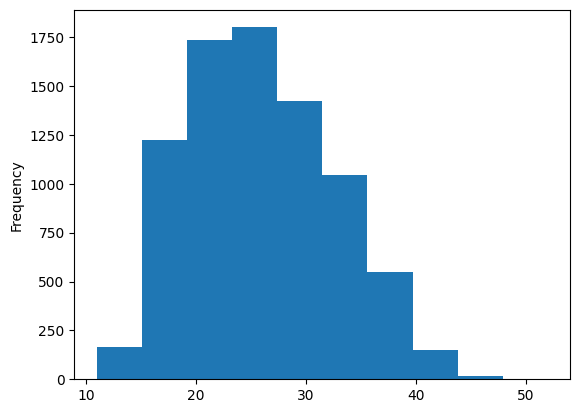

In [31]:
# Histograma da idade da mãe:

df_amostral['IDADEMAE'].plot.hist()

#### 4) Faça um histograma do peso do bebê

<Axes: ylabel='Frequency'>

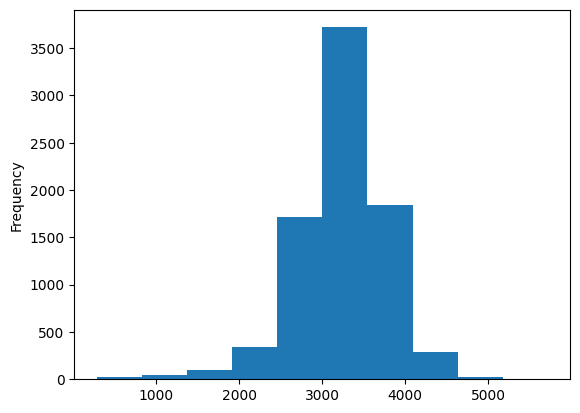

In [32]:
# Histograma considerando os outliers comentados:

df_amostral["PESO"].plot.hist()

<Axes: ylabel='Frequency'>

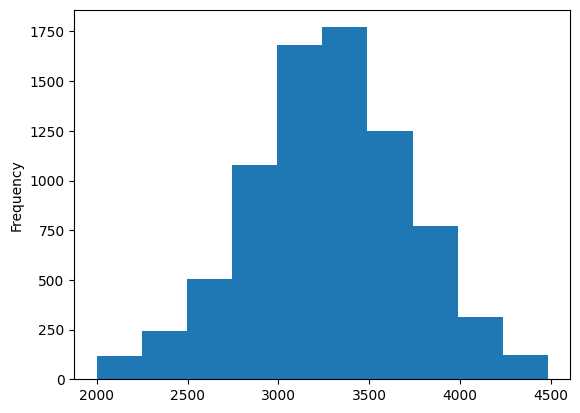

In [33]:
# Histograma desconsiderando os outliers comentados:

df_amostral_2['PESO'].plot.hist()